<a href="https://colab.research.google.com/github/dinoboy22/Machine-learning-Math/blob/main/MLMath_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/diabetes_prediction_dataset.csv')

In [5]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df['smoking_history'].value_counts()

smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64

In [9]:
df['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [10]:
df = pd.get_dummies(df, columns = ['gender'], dtype=int)

In [11]:
df.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other
0,80.0,0,1,never,25.19,6.6,140,0,1,0,0
1,54.0,0,0,No Info,27.32,6.6,80,0,1,0,0
2,28.0,0,0,never,27.32,5.7,158,0,0,1,0
3,36.0,0,0,current,23.45,5.0,155,0,1,0,0
4,76.0,1,1,current,20.14,4.8,155,0,0,1,0


In [12]:
def encoding(data):
  if data == 'never':
    return 0
  elif data == 'No Info':
    return 0
  elif data == 'former':
    return 1
  elif data == 'not current':
    return 1
  elif data == 'current':
    return 2
  elif data == 'ever':
    return 2


In [13]:
df['smoking_history'] = df['smoking_history'].apply(encoding)

In [14]:
df.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other
0,80.0,0,1,0,25.19,6.6,140,0,1,0,0
1,54.0,0,0,0,27.32,6.6,80,0,1,0,0
2,28.0,0,0,0,27.32,5.7,158,0,0,1,0
3,36.0,0,0,2,23.45,5.0,155,0,1,0,0
4,76.0,1,1,2,20.14,4.8,155,0,0,1,0


In [44]:
#신경망 학습

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [16]:
network = Sequential()

In [18]:
network.add(Dense(units = 6, activation = 'relu'))
network.add(Dense(units = 6, activation = 'relu'))
network.add(Dense(units = 1, activation = 'sigmoid'))

In [19]:
network.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
X = df.iloc[:,[0,1,2,3,4,5,6,8,9,10]]
Y = df.iloc[:,7]

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

In [30]:
hist_network = network.fit(X_train, Y_train, epochs=100, batch_size=500, validation_split=0.25)

Epoch 1/100
116/116 [==============================] - 1s 4ms/step - loss: 0.3671 - accuracy: 0.9113 - val_loss: 0.3045 - val_accuracy: 0.9145
Epoch 2/100
116/116 [==============================] - 0s 3ms/step - loss: 0.3116 - accuracy: 0.9113 - val_loss: 0.2933 - val_accuracy: 0.9145
Epoch 3/100
116/116 [==============================] - 0s 3ms/step - loss: 0.3039 - accuracy: 0.9131 - val_loss: 0.2858 - val_accuracy: 0.9193
Epoch 4/100
116/116 [==============================] - 0s 3ms/step - loss: 0.2950 - accuracy: 0.9184 - val_loss: 0.2776 - val_accuracy: 0.9236
Epoch 5/100
116/116 [==============================] - 0s 3ms/step - loss: 0.2865 - accuracy: 0.9198 - val_loss: 0.2699 - val_accuracy: 0.9226
Epoch 6/100
116/116 [==============================] - 0s 3ms/step - loss: 0.2769 - accuracy: 0.9222 - val_loss: 0.2609 - val_accuracy: 0.9254
Epoch 7/100
116/116 [==============================] - 0s 3ms/step - loss: 0.2686 - accuracy: 0.9241 - val_loss: 0.2533 - val_accuracy: 0.9279

In [31]:
score=network.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

601/601 [==============================] - 1s 1ms/step - loss: 0.1192 - accuracy: 0.9572
Test accuracy: 0.9571502804756165


In [38]:
network1 = Sequential()

network1.add(Dense(units = 6, activation = 'relu'))
network1.add(Dense(units = 6, activation = 'relu'))
network1.add(Dense(units = 1, activation = 'sigmoid'))

network1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [40]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)
modelpath = "/content/drive/MyDrive/model"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)
hist_network1=network1.fit(X_train, Y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=2, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/2000
116/116 - 2s - loss: 1.1974 - accuracy: 0.8359 - val_loss: 0.6059 - val_accuracy: 0.9048 - 2s/epoch - 17ms/step
Epoch 2/2000
116/116 - 1s - loss: 0.5765 - accuracy: 0.9131 - val_loss: 0.5514 - val_accuracy: 0.9182 - 899ms/epoch - 8ms/step
Epoch 3/2000
116/116 - 1s - loss: 0.5330 - accuracy: 0.9152 - val_loss: 0.5131 - val_accuracy: 0.9180 - 872ms/epoch - 8ms/step
Epoch 4/2000
116/116 - 1s - loss: 0.4977 - accuracy: 0.9159 - val_loss: 0.4804 - val_accuracy: 0.9197 - 876ms/epoch - 8ms/step
Epoch 5/2000
116/116 - 1s - loss: 0.4672 - accuracy: 0.9163 - val_loss: 0.4516 - val_accuracy: 0.9212 - 888ms/epoch - 8ms/step
Epoch 6/2000
116/116 - 1s - loss: 0.4407 - accuracy: 0.9169 - val_loss: 0.4261 - val_accuracy: 0.9204 - 878ms/epoch - 8ms/step
Epoch 7/2000
116/116 - 1s - loss: 0.4171 - accuracy: 0.9177 - val_loss: 0.4035 - val_accuracy: 0.9220 - 877ms/epoch - 8ms/step
Epoch 8/2000
116/116 - 1s - loss: 0.3961 - accuracy: 0.9183 - val_loss: 0.3833 - val_accuracy: 0.9221 - 884ms/epo

In [41]:
hist_df=pd.DataFrame(hist_network1.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,1.197420,0.835942,0.605900,0.904831
1,0.576467,0.913065,0.551356,0.918248
2,0.532966,0.915232,0.513124,0.918040
3,0.497734,0.915908,0.480380,0.919705
4,0.467218,0.916324,0.451565,0.921213
...,...,...,...,...
124,0.113082,0.960234,0.110208,0.961724
125,0.112984,0.960390,0.110426,0.962297
126,0.112937,0.960216,0.115618,0.960060
127,0.114249,0.959402,0.118592,0.958552


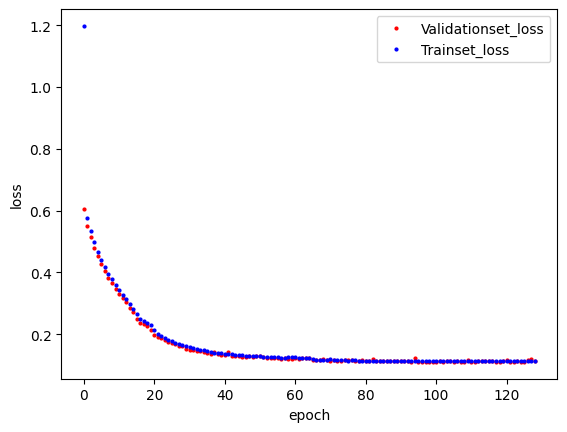

In [42]:
y_vloss=hist_df['val_loss']

y_loss=hist_df['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Validationset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [71]:
from sklearn.model_selection import KFold

network2 = Sequential()

network2.add(Dense(units = 6, activation = 'relu'))
network2.add(Dense(units = 6, activation = 'relu'))
network2.add(Dense(units = 1, activation = 'sigmoid'))

network2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [72]:
k=5
kfold = KFold(n_splits=k, shuffle=True)
acc_score = []

In [73]:
for train_index, test_index in kfold.split(X):
  X_train2, X_test2 = X.iloc[train_index,:], X.iloc[test_index,:]
  Y_train2, Y_test2 = Y.iloc[train_index], Y.iloc[test_index]
  history=network2.fit(X_train2, Y_train2, epochs=20, batch_size=500, verbose=1)
  accuracy = network2.evaluate(X_test2, Y_test2)[1]
  acc_score.append(accuracy)

avg_acc_score = sum(acc_score)/k

print('정확도:', acc_score)
print('정확도 평균:', avg_acc_score)

Epoch 1/20
154/154 [==============================] - 4s 8ms/step - loss: 1.9454 - accuracy: 0.6273
Epoch 2/20
154/154 [==============================] - 1s 7ms/step - loss: 0.4000 - accuracy: 0.8821
Epoch 3/20
154/154 [==============================] - 1s 5ms/step - loss: 0.3666 - accuracy: 0.9093
Epoch 4/20
154/154 [==============================] - 0s 2ms/step - loss: 0.3570 - accuracy: 0.9122
Epoch 5/20
154/154 [==============================] - 0s 2ms/step - loss: 0.3502 - accuracy: 0.9122
Epoch 6/20
154/154 [==============================] - 0s 2ms/step - loss: 0.3435 - accuracy: 0.9122
Epoch 7/20
154/154 [==============================] - 0s 2ms/step - loss: 0.3362 - accuracy: 0.9122
Epoch 8/20
154/154 [==============================] - 0s 2ms/step - loss: 0.3289 - accuracy: 0.9122
Epoch 9/20
154/154 [==============================] - 0s 2ms/step - loss: 0.3213 - accuracy: 0.9122
Epoch 10/20
154/154 [==============================] - 0s 2ms/step - loss: 0.3137 - accuracy: 0.9122

In [101]:
avg_acc_score = sum(acc_score)/k

print('정확도:', acc_score)
print('정확도 평균:', avg_acc_score)

정확도: [0.9212168455123901, 0.9374382495880127, 0.957304060459137, 0.9584481716156006, 0.9581881761550903]
정확도 평균: 0.9465191006660462


In [107]:
del network

In [108]:
import keras

In [110]:
network = Sequential()
network.add(Dense(units = 50, activation = 'relu', kernel_initializer="he_normal",
                  kernel_regularizer=keras.regularizers.l1_l2(0.1,0.01)))
network.add(keras.layers.Dropout(rate=0.2))
network.add(Dense(units = 20, activation = 'relu',kernel_initializer="he_normal",
                  kernel_regularizer=keras.regularizers.l1_l2(0.1,0.01) ))
network.add(keras.layers.Dropout(rate=0.2))
network.add(Dense(units = 1, activation = 'sigmoid', kernel_regularizer=keras.regularizers.l1_l2(0.1,0.01)))

network.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [111]:
hist_network = network.fit(X_train, Y_train, epochs=100, batch_size=500, validation_split=0.25)

Epoch 1/100
116/116 [==============================] - 2s 9ms/step - loss: 39.4288 - accuracy: 0.7908 - val_loss: 28.0431 - val_accuracy: 0.9145
Epoch 2/100
116/116 [==============================] - 1s 6ms/step - loss: 23.6908 - accuracy: 0.8179 - val_loss: 18.2561 - val_accuracy: 0.9145
Epoch 3/100
116/116 [==============================] - 1s 4ms/step - loss: 15.5679 - accuracy: 0.8670 - val_loss: 12.6664 - val_accuracy: 0.9145
Epoch 4/100
116/116 [==============================] - 0s 4ms/step - loss: 10.9262 - accuracy: 0.8912 - val_loss: 9.1321 - val_accuracy: 0.9145
Epoch 5/100
116/116 [==============================] - 0s 4ms/step - loss: 7.9398 - accuracy: 0.8992 - val_loss: 6.6864 - val_accuracy: 0.9145
Epoch 6/100
116/116 [==============================] - 0s 4ms/step - loss: 5.8354 - accuracy: 0.9013 - val_loss: 4.9462 - val_accuracy: 0.9145
Epoch 7/100
116/116 [==============================] - 0s 4ms/step - loss: 4.3584 - accuracy: 0.9030 - val_loss: 3.7337 - val_accuracy:

In [112]:
score=network.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

601/601 [==============================] - 1s 2ms/step - loss: 0.3184 - accuracy: 0.9105
Test accuracy: 0.9105044007301331


In [ ]:
# 이 아키텍처의 경우, dropout 세트는 심층신경망에서 과대적합을 방지함으로 인해 성능을 높이는 기법인데 지금 쓴 신경망은
# layer의 수도 많지 않고 뉴런도 많지 않으므로 성능을 높이는데 기여하지 못했고, 그리고 l1_l2 규제에서 l2 규제는 sgd와 같은
# optimizer에 적용했을 때는 좋지만, adam과 사용했을 때는 좋지 못하기에 AdamW라는 다른 방법이 있다고 한다.
# 이런 이유들로 인해서 위의 코드는 충분히 좋은 성능을 내지 못한 것 같다.